## Ejercicio 1

El detector de bordes Canny, dada una imágen detecta los bordes de la misma. Parte de lo que se conoce como el operador Sobel donde se buscan todos los máximos locales de la misma. Los máximos locales son indicadores de un borde. A partir de este resultado, toma solo aquellos que superen cierto threshold.

Canny toma como parámetros

- Imágen blurreada (para ignorar posible ruido)
- Threshold inferior: valores en los que no se considera línea
- Threshold superior: a partir de cuando se considera línea

Entre los valores inferior y superior se realiza histeresis. Esto significa que no se considera que esta por debajo o por arriba hasta que se halla un valor por encima o por debajo.


HoughLinesP toma como parámetros

- El Canny de la imágen
- Rho: la máxima distancia de la línea detectada al origen de la imágen
- Phi: el angulo que forma la linea respecto con el origen
- Threshold: la cantidad de puntos que deben pasar para considerarla linea
- MinLineLength: la longitud mínima de la línea
- MaxLineLength: la longitud máxima de la línea

In [1]:
import cv2
import skimage
from pathlib import Path
import numpy as np

In [2]:
ASSETS_FOLDER_PATH = "./assets"
OUTPUT_FOLDER_PATH = "."

In [3]:
Path(OUTPUT_FOLDER_PATH).mkdir(parents=True, exist_ok=True)

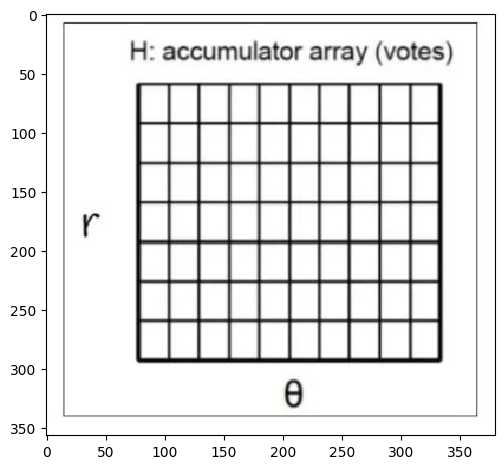

In [4]:
acumulator = skimage.io.imread(f"{ASSETS_FOLDER_PATH}/acumulator.png")
skimage.io.imshow(acumulator)

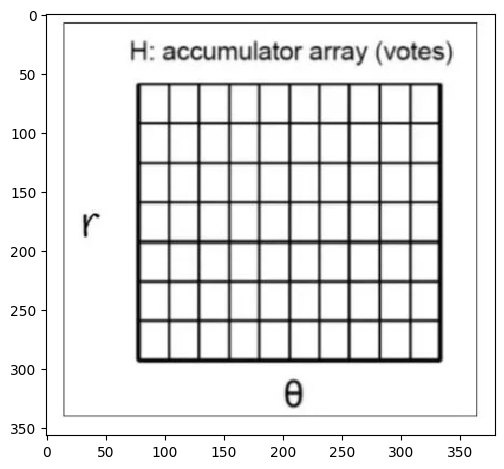

In [5]:
acumulator_bw = cv2.cvtColor(acumulator, cv2.COLOR_RGB2GRAY)
skimage.io.imshow(acumulator_bw)

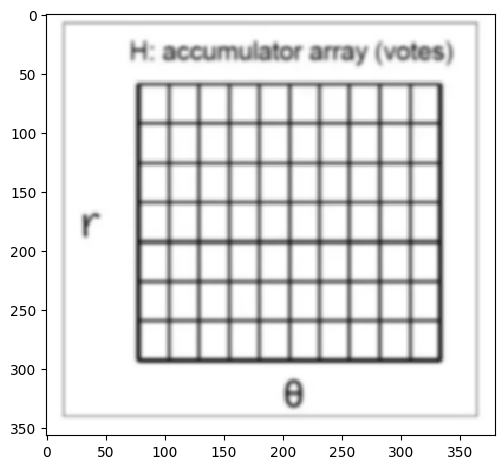

In [6]:
blurred_acumulator = cv2.GaussianBlur(acumulator_bw, (7, 7), 0)
skimage.io.imshow(blurred_acumulator)

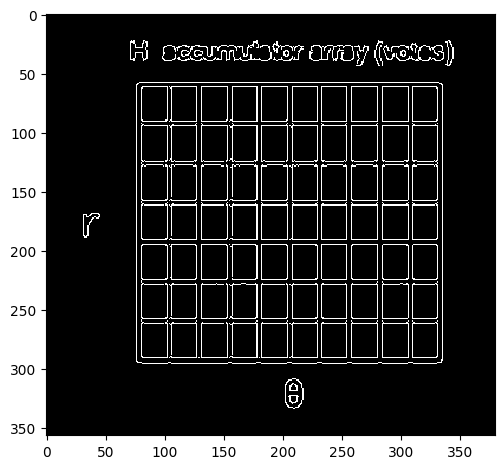

In [7]:
canny_acumulator = cv2.Canny(blurred_acumulator, 150, 230)
skimage.io.imshow(canny_acumulator)

In [8]:
acumulator_lines = cv2.HoughLinesP(canny_acumulator,1,np.pi/180,15)
detected_acumulator = acumulator_bw.copy()
for i in range(detected_acumulator.shape[0]):
    for j in range(detected_acumulator.shape[1]):
        detected_acumulator[i][j] = 0
for line in acumulator_lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(acumulator_bw,(x1,y1),(x2,y2),128,2)
    cv2.line(detected_acumulator,(x1,y1),(x2,y2),128,2)

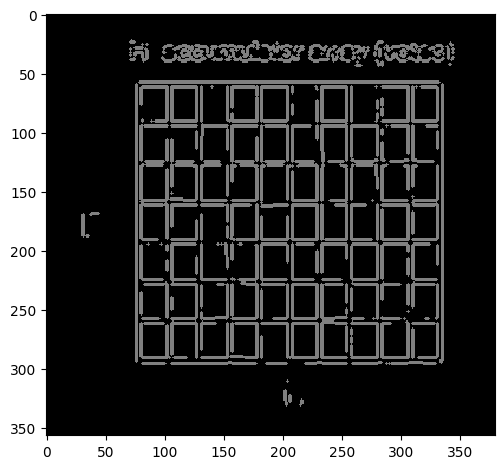

In [9]:
skimage.io.imshow(detected_acumulator)

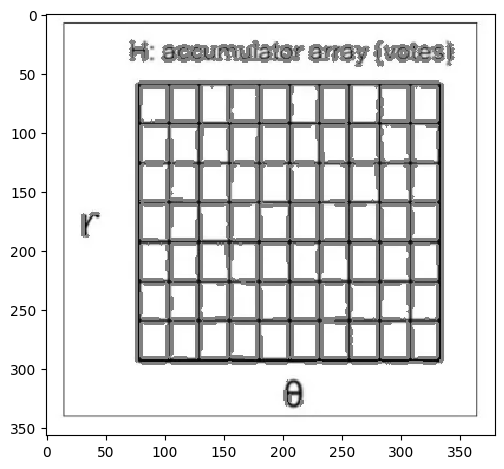

In [10]:
skimage.io.imshow(acumulator_bw)

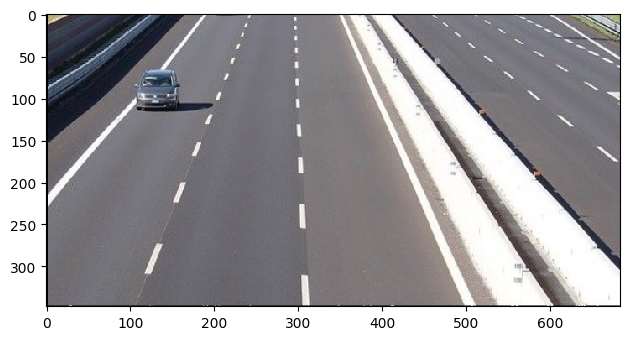

In [11]:
lanes = skimage.io.imread(f"{ASSETS_FOLDER_PATH}/lanes.png")
skimage.io.imshow(lanes)

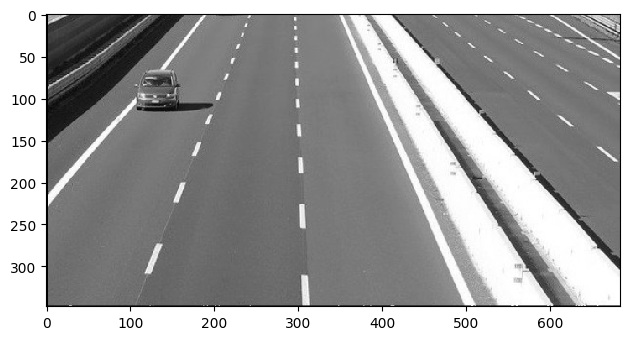

In [12]:
lanes_bw = cv2.cvtColor(lanes, cv2.COLOR_RGB2GRAY)
skimage.io.imshow(lanes_bw)

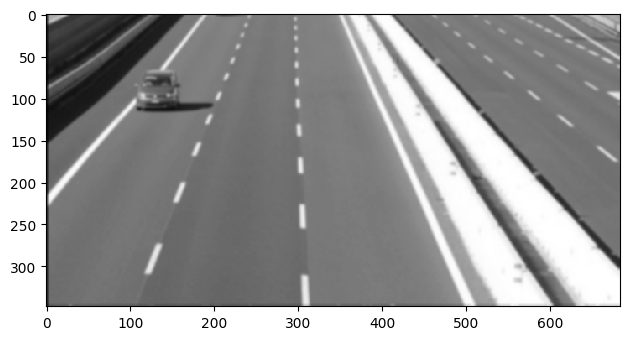

In [13]:
blurred_lanes = cv2.GaussianBlur(lanes_bw, (7, 7), 0)
skimage.io.imshow(blurred_lanes)

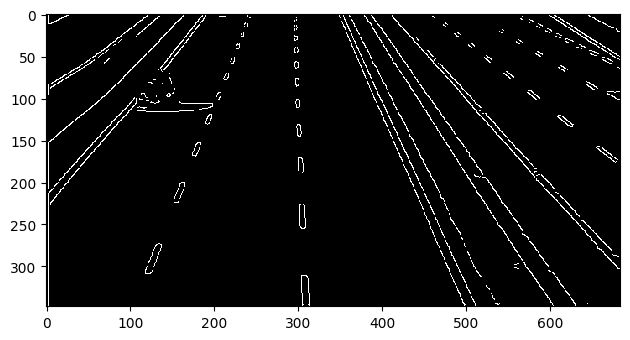

In [14]:
canny_lanes = cv2.Canny(blurred_lanes, 150, 160)
skimage.io.imshow(canny_lanes)

In [15]:
lanes_lines = cv2.HoughLinesP(canny_lanes,1,np.pi/180,20)
detected_lanes = lanes_bw.copy()
for i in range(detected_lanes.shape[0]):
    for j in range(detected_lanes.shape[1]):
        detected_lanes[i][j] = 0
for line in lanes_lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(detected_lanes,(x1,y1),(x2,y2),128,2)
    cv2.line(lanes_bw,(x1,y1),(x2,y2),128,2)

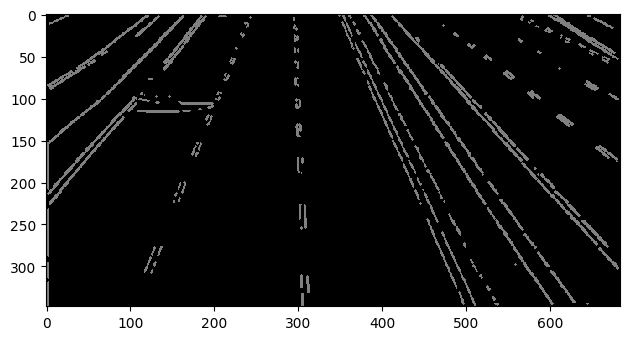

In [16]:
skimage.io.imshow(detected_lanes)

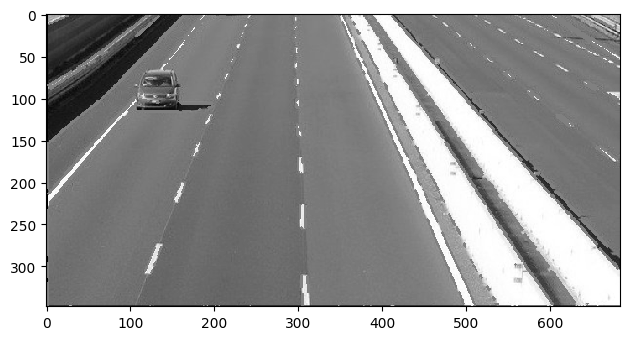

In [17]:
skimage.io.imshow(lanes_bw)